### Data cleaning

In [12]:
# Import all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Development dataset cleaning

1. Load the development dataset using the `read_csv` function from the `pandas` library.

In [13]:
df_dev = pd.read_csv("../data/assignment1_dev_set.csv")

2. Explore the sample size using `.shape`

In [14]:
df_dev.shape 

(489, 141)

3. Explore the dataset using `head()`

In [27]:
df_dev.head() 

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,19.01,0.000000,0.000000,0.000000,0.000000,0.017674,0.000000,0.00000,0.0,0.117827,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,23.50,0.001028,0.000000,0.000000,0.000000,13.015800,0.001542,0.00000,0.0,0.073486,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,25.80,0.001406,0.000000,0.000000,0.001406,0.002812,0.201074,0.00000,0.0,0.043590,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,23.49,0.000000,0.008825,0.273562,0.000000,0.044123,0.004412,0.34857,0.0,0.026474,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,22.60,0.002878,0.037419,7.359970,0.000000,0.872143,0.000000,0.00000,0.0,1.732770,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


4. Check for any missing values using  `.isnull()`

In [28]:

list(df_dev.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

5. Remove the unnecessary columns, specifically the metadata ones and keep only the target (BMI) and features (bacteria species).

In [ ]:
metadata_columns = ['Project ID','Experiment type', 'Sex', 'Host age','Disease MESH ID']
df_dev = df_dev.drop(columns = metadata_columns)
df_dev = df_dev.iloc[:, 1:]
df_dev

6. Save the cleaned dataset using `.to_csv` in the `data/` directory.

In [19]:
df_dev.to_csv("../data/development_final_data.csv", index=False)

7. Extract plots fro visual interpretation.

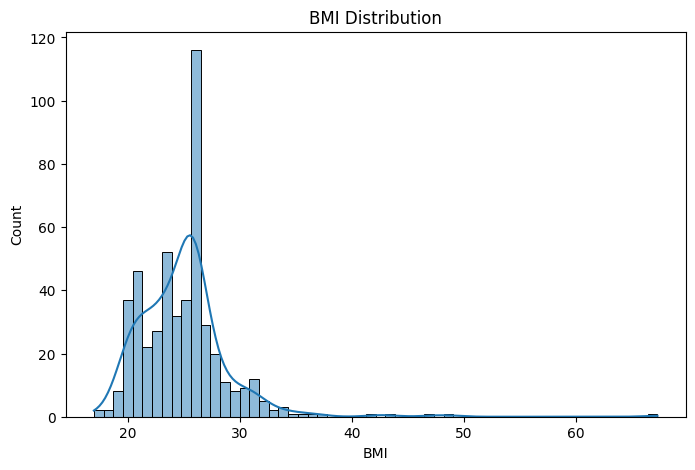

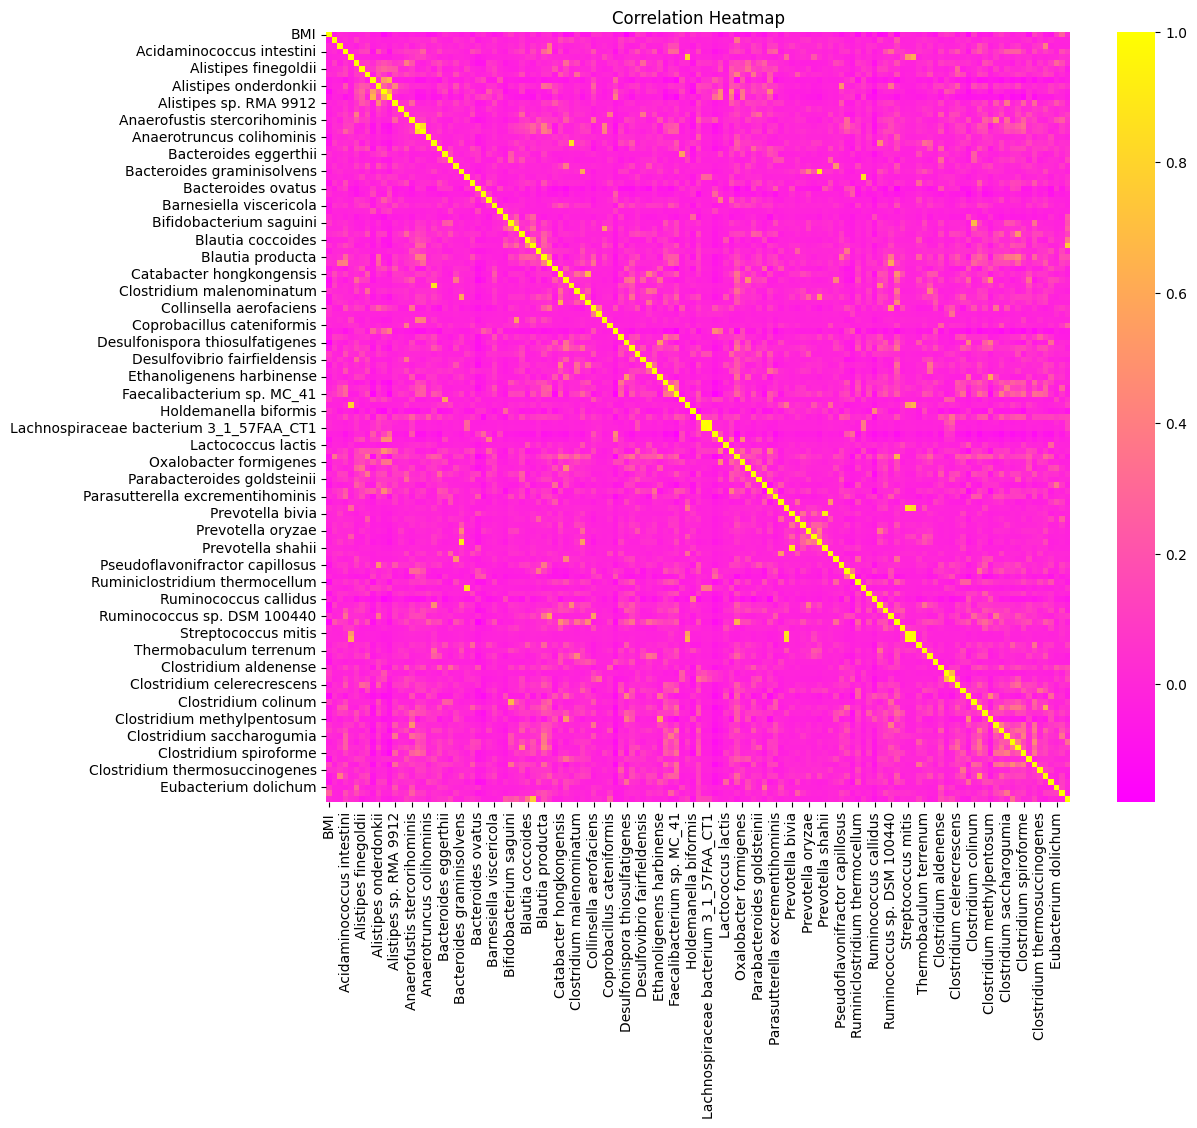

C:\Users\Maria Defteraiou\AppData\Local\Temp\ipykernel_33496\3788687798.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_abundance.index, y=mean_abundance.values, palette="viridis")


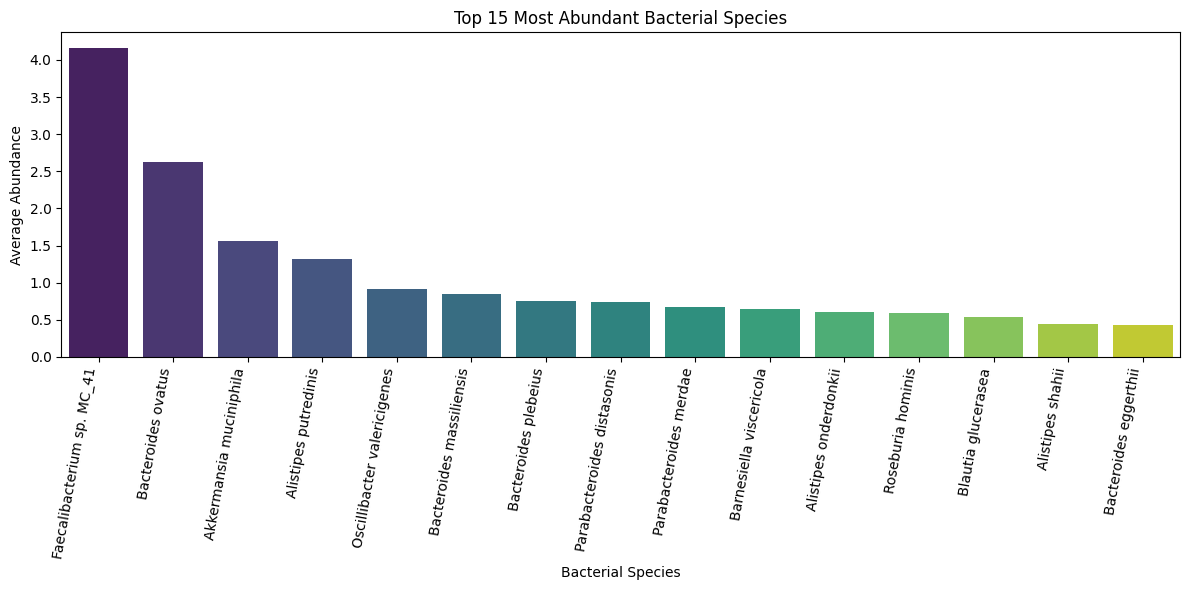

In [29]:
# Example: BMI distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(df_dev['BMI'], kde=True)
plt.title("BMI Distribution")
plt.show()

# Correlation heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(df_dev.corr(), cmap='spring')
plt.title("Correlation Heatmap")
plt.show()

# Calculate mean abundance for each bacterial species across samples
bacteria_species_cleaned=df_dev.columns.drop(['BMI'])
mean_abundance = df_dev[bacteria_species_cleaned].mean().sort_values(ascending=False).head(15)

# Plotting the top 15 most abundant bacteria species
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_abundance.index, y=mean_abundance.values, palette="viridis")
plt.title('Top 15 Most Abundant Bacterial Species')
plt.ylabel('Average Abundance')
plt.xlabel('Bacterial Species')
plt.xticks(rotation=80, ha='right')
plt.tight_layout()
plt.show()

Validation dataset cleaning

1. Load the validation dataset using the `read_csv` function from the `pandas` library.

In [21]:
df_val = pd.read_csv("../data/assignment1_val_set.csv")

2. Explore the sample size using `.shape`

In [22]:
df_val.shape

(211, 141)

3. Explore the dataset using `head()`

In [30]:
df_val.head()

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,25.71,0.0,0.000000,1.621960,0.0,0.000000,0.068238,0.020996,0.0,0.031494,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,27.20,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,22.35,0.0,0.002095,0.000000,0.0,0.002095,0.041895,0.000000,0.0,0.140346,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,25.52,0.0,0.000000,0.044998,0.0,0.013846,0.010384,0.000000,0.0,0.041537,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,21.60,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


4. Check for any missing values using  `.isnull()`

In [31]:
list(df_val.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

5. Remove the unnecessary columns, specifically the metadata ones and keep only the target (BMI) and features (bacteria species).

In [ ]:
metadata_columns = ['Project ID','Experiment type', 'Sex', 'Host age','Disease MESH ID']
df_val = df_val.drop(columns = metadata_columns)
df_val = df_val.iloc[:, 1:]
df_val

6. Save the cleaned dataset using `.to_csv` in the `data/` directory.

In [26]:
df_val.to_csv("../data/evaluation_final_data.csv", index=False)